In [15]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
np.set_printoptions(precision=3, suppress=True)

In [16]:
# Load dữ liệu: data-example/example_sales_vn.csv
import csv
file_path = "sale-data/supermarket_sales_vn.csv"

row_list = []
with open(file_path, newline='',encoding='utf-8') as csv_file:
    data_csv = csv.reader(csv_file, delimiter=',')
    header = next(data_csv)
    print(header)
    for row in data_csv:
        row_list.append(row)
n_rows = len(row_list)
print("Tổng số dòng data: ", n_rows)

print("Hiển thị thử 10 dòng đầu:")
for i in range(10): print(row_list[i])
print("Hiển thị thử 10 dòng cuối:")
for i in range(10): print(row_list[-(10-i)])

['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'Rating']
Tổng số dòng data:  1000
Hiển thị thử 10 dòng đầu:
['750-67-8428', 'Hà Nội', 'Member', 'Nữ', 'Health and beauty', '74.69', '7', '26.1415', '548.9715', '1/5/19', '13:08', 'Ewallet', '522.83', '9.1']
['226-31-3081', 'TP HCM', 'Normal', 'Nữ', 'Electronic accessories', '15.28', '5', '3.82', '80.22', '3/8/19', '10:29', 'Cash', '76.4', '9.6']
['631-41-3108', 'Hà Nội', 'Normal', 'Nam', 'Home and lifestyle', '46.33', '7', '16.2155', '340.5255', '3/3/19', '13:23', 'Credit card', '324.31', '7.4']
['123-19-1176', 'Hà Nội', 'Member', 'Nam', 'Health and beauty', '58.22', '8', '23.288', '489.048', '1/27/19', '20:33', 'Ewallet', '465.76', '8.4']
['373-73-7910', 'Hà Nội', 'Normal', 'Nam', 'Sports and travel', '86.31', '7', '30.2085', '634.3785', '2/8/19', '10:37', 'Ewallet', '604.17', '5.3']
['699-14-3026', 'TP HCM', 'Normal', 'Nam', 'Electronic ac

# 1. Phân tích mô tả theo số lượng đơn
## 1.1. Theo chi nhánh (City):

In [17]:
ds_tp = [row[1] for row in row_list]
ds_gt = [row[3] for row in row_list]

In [18]:
count_HN = ds_tp.count('Hà Nội')
count_SG = ds_tp.count('TP HCM')
count_ĐN = ds_tp.count('Đà Nẵng')

print(count_HN, count_SG, count_ĐN)

274 490 236


## Biểu đồ cột: bar()

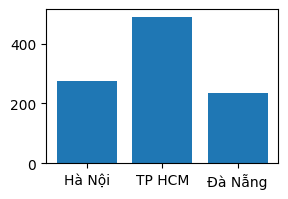

In [7]:
plt.figure(figsize=(3,2))
plt.bar(x=[0,1,2],height=[count_HN, count_SG, count_ĐN])
plt.xticks([0,1,2],["Hà Nội", "TP HCM", "Đà Nẵng"])
plt.show()

## Biểu đồ hình tròn

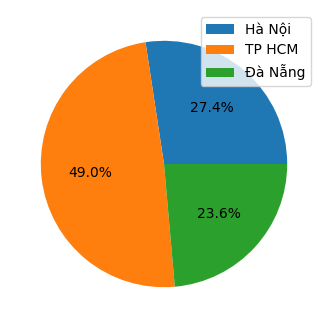

In [8]:
plt.figure(figsize=(4,4))
plt.pie([count_HN, count_SG, count_ĐN], autopct='%1.1f%%')
plt.legend(["Hà Nội", "TP HCM", "Đà Nẵng"])
plt.show()

## 1.2. Theo các cột phân loại khác:
* Giới tính (Gender)?
* Loại sản phản (Product line)?
* Loại thanh toán (Payment)?

# 2. Phân tích mô tả của tổng đơn

In [19]:
ds_gia = np.array([float(row[5]) for row in row_list])
ds_soluong = np.array([float(row[6]) for row in row_list])
ds_tong = np.array([float(row[8]) for row in row_list])
ds_rate = np.array([float(row[13]) for row in row_list])

## Độ đo về sự mở rộng

In [26]:
print(np.min(ds_tong))
print(np.max(ds_tong))
print(np.ptp(ds_tong))
print(np.var(ds_tong))
print(np.std(ds_tong))

10.6785
1042.65
1031.9715
60399.138419699506
245.76236168237705


## Tần suất

In [28]:
hanoi = ds_tong[np.array(ds_tp) == "Hà Nội"]
tphcm = ds_tong[np.array(ds_tp) == "TP HCM"]
danang = ds_tong[np.array(ds_tp) == "Đà Nẵng"]

In [39]:
tong_HN = np.sum(hanoi)
tong_SG = np.sum(tphcm)
tong_ĐN = np.sum(danang)

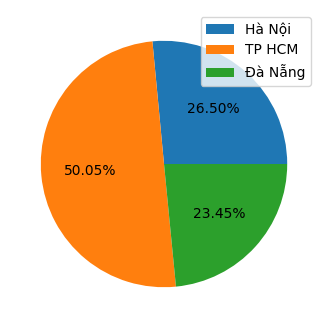

In [41]:
plt.figure(figsize=(4,4))
plt.pie([tong_HN, tong_SG, tong_ĐN], autopct='%.2f%%')
plt.legend(["Hà Nội", "TP HCM", "Đà Nẵng"])
plt.show()

## Khuynh hướng tập trung

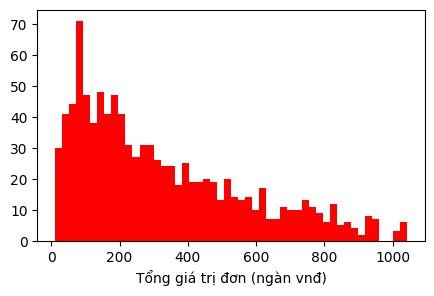

In [11]:
fig, ax = plt.subplots(figsize=(5,3), num=1)
ax.hist(ds_tong, bins=50, color='red')
ax.set_xlabel("Tổng giá trị đơn (ngàn vnđ)")
plt.show()

In [8]:
mean = np.mean(ds_tong)
median = np.median(ds_tong)
h = np.histogram(ds_tong, bins=50)
counts, bins = h
mode_idx = np.argmax(counts)
mode = np.mean([bins[mode_idx], bins[mode_idx+1]])
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 322.966749
Median: 253.848
Mode: 82.916505


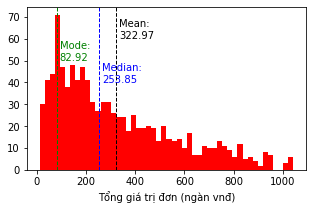

In [9]:
fig, ax = plt.subplots(figsize=(5,3), num=1)
ax.hist(ds_tong, bins=50, color='red')
ax.set_xlabel("Tổng giá trị đơn (ngàn vnđ)")

ax.axvline(mean, color='k', linestyle='dashed', linewidth=1)
ax.text(mean+10, 60, f"Mean:\n{mean:.2f}", color="k")

ax.axvline(median, color='b', linestyle='dashed', linewidth=1)
ax.text(median+10, 40, f"Median:\n{median:.2f}", color="b")

ax.axvline(mode, color='g', linestyle='dashed', linewidth=1)
ax.text(mode+10, 50, f"Mode:\n{mode:.2f}", color="g")

plt.show()

In [14]:
# Phần trăm khi khách hàng ảnh hưởng khi quyết định freeship cho đơn hàng lớn hơn Mean
np.count_nonzero(ds_tong > mean)/1000

0.404

## Phân vị

In [20]:
np.quantile(ds_tong, [0.25, 0.5, 0.75])

array([124.422, 253.848, 471.35 ])

In [22]:
# Giả sử ta muốn khuyến mãi tiền ship (30k) cho KH có hóa đơn >500k
pct500k = np.count_nonzero(ds_tong>500)/ds_tong.size
print(pct500k)

# Kỳ vọng những người mua tầm 470k sẽ tăng mua để được freeship
# Khả năng bao nhiêu phần trăm số người sẽ tăng mua?
pct470k = np.count_nonzero(ds_tong>470)/ds_tong.size
print(pct470k)
print(f"{100*(pct470k - pct500k):.2f}%")

0.227
0.254
2.70%


In [27]:
print(mean)
# Giả sử ta muốn khuyến mãi tiền ship (30k) cho KH có hóa đơn > mean
pct_mean = np.count_nonzero(ds_tong>mean)/ds_tong.size
print(pct_mean)

# Kỳ vọng những người mua tầm 293k sẽ tăng mua để được freeship
# Khả năng bao nhiêu phần trăm số người sẽ tăng mua?
pct293k = np.count_nonzero(ds_tong>mean-30)/ds_tong.size
print(pct293k)
print(f"{100*(pct293k - pct_mean):.2f}%")

322.966749
0.404
0.444
4.00%


## Dạng phân bố

In [17]:
stats.skew(ds_tong)

0.8912303920037631

In [18]:
stats.kurtosis(ds_tong)

-0.08746991289329031

## Tương quan

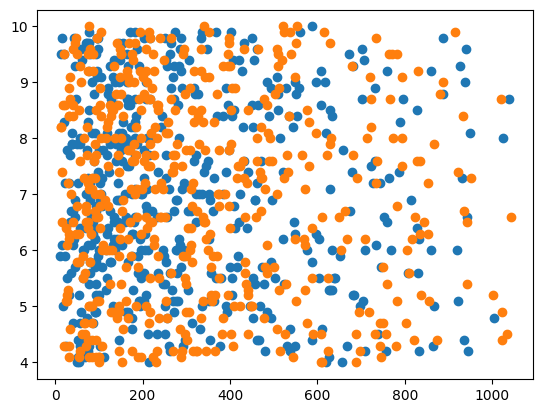

In [19]:
nam = np.array(ds_gt) == "Nam"
nu = np.array(ds_gt) == "Nữ"
plt.scatter(ds_tong[nam], ds_rate[nam])
plt.scatter(ds_tong[nu], ds_rate[nu])
plt.show()

In [20]:
print(np.cov(ds_tong, ds_rate))

[[60459.598   -15.399]
 [  -15.399     2.954]]


In [21]:
print(np.corrcoef(ds_tong, ds_rate))

[[ 1.    -0.036]
 [-0.036  1.   ]]
